# Introduction complète à numpy

Ce chapitre offre une introduction complète à NumPy, la bibliothèque fondamentale pour le calcul scientifique en Python. Nous aborderons les concepts de base, la manipulation de tableaux, la visualisation, des exemples avancés de traitement d'images, et conclurons avec des défis pratiques pour solidifier vos compétences.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data
from scipy.ndimage import binary_erosion, binary_dilation
from time import time

---
## 1. Manipulation de base des tableaux 1D

Création de tableaux, accès aux attributs, changement de type, et techniques d'indexation.

In [2]:
print("### Manipulations 1D ###")
array = np.array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5])
print("Initialisation simple:", array)
print("Attributs (shape, dtype):", array.shape, array.dtype)

array_int = np.array(array, dtype=np.int16)
print("Changement de type:", array_int)

print("Indexation [4]:", array_int[4])
print("Slicing [4:7]:", array_int[4:7])
print("Slicing avancé [1::2]:", array_int[1::2])

### Manipulations 1D ###
Initialisation simple: [0.5 1.5 2.5 3.5 4.5 5.5 6.5 7.5 8.5 9.5]
Attributs (shape, dtype): (10,) float64
Changement de type: [0 1 2 3 4 5 6 7 8 9]
Indexation [4]: 4
Slicing [4:7]: [4 5 6]
Slicing avancé [1::2]: [1 3 5 7 9]


---
## 2. Opérations de base et création de tableaux

Opérations vectorisées et fonctions utilitaires pour générer des tableaux.

In [3]:
print("### Opérations de Base ###")
array = np.ones(10)
array[0:5] = 0.5
print("Tableau modifié:", array)

array = array * 3 + 7
print("Opérations vectorisées (*3 + 7):", array)

print("Nombres aléatoires:", np.random.random(5))
print("Séquence (arange):", np.arange(5))
print("Séquence espacée (linspace):", np.linspace(10, 25, 4))

### Opérations de Base ###
Tableau modifié: [0.5 0.5 0.5 0.5 0.5 1.  1.  1.  1.  1. ]
Opérations vectorisées (*3 + 7): [ 8.5  8.5  8.5  8.5  8.5 10.  10.  10.  10.  10. ]
Nombres aléatoires: [0.19979723 0.7988347  0.44425176 0.30482501 0.09032596]
Séquence (arange): [0 1 2 3 4]
Séquence espacée (linspace): [10. 15. 20. 25.]


---
## 3. Visualisation de données 1d

Utilisation de Matplotlib pour tracer des fonctions.

### Visualisation 1D ###


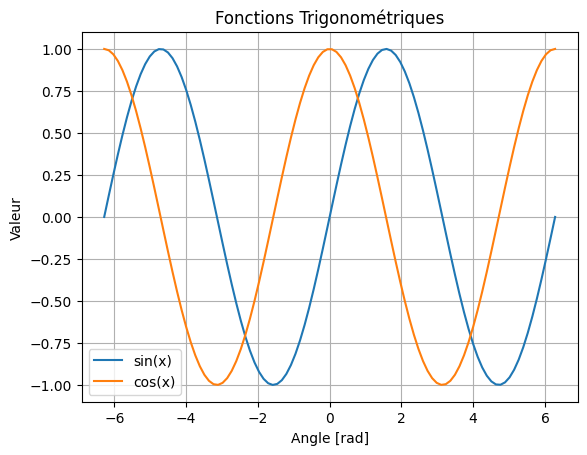

In [4]:
print("### Visualisation 1D ###")
x = np.linspace(-2 * np.pi, 2 * np.pi, 100)
plt.plot(x, np.sin(x), label='sin(x)')
plt.plot(x, np.cos(x), label='cos(x)')
plt.title('Fonctions Trigonométriques')
plt.xlabel('Angle [rad]')
plt.ylabel('Valeur')
plt.grid(True)
plt.legend()
plt.show()

---
## 4. Manipulation de tableaux 2d (matrices)

Extension des concepts aux matrices.

In [5]:
print("### Manipulations 2D ###")
array_2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print("Matrice 3x3:\n", array_2d)
print("Attributs (shape, dtype):", array_2d.shape, array_2d.dtype)
print("Indexation (ligne 2):", array_2d[2, :])
print("Indexation (colonne 2):", array_2d[:, 2])

### Manipulations 2D ###
Matrice 3x3:
 [[1 2 3]
 [4 5 6]
 [7 8 9]]
Attributs (shape, dtype): (3, 3) int64
Indexation (ligne 2): [7 8 9]
Indexation (colonne 2): [3 6 9]


---
## 5. Visualisation de données 2D

Affichage de matrices en tant qu'images.

### Visualisation 2D ###


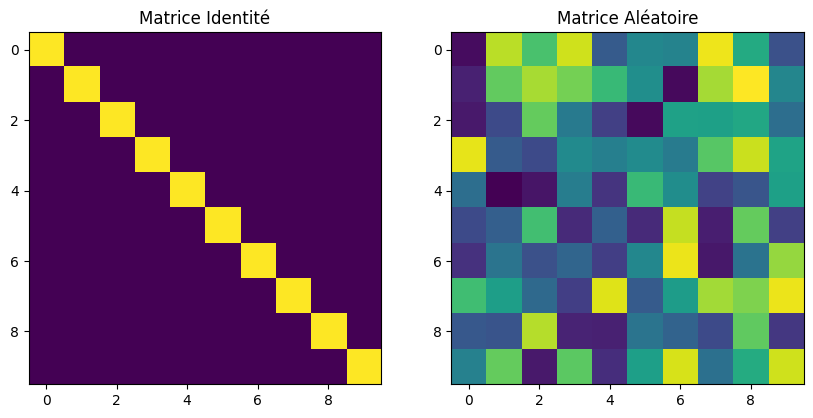

In [6]:
print("### Visualisation 2D ###")
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(np.eye(10))
axs[0].set_title('Matrice Identité')
axs[1].imshow(np.random.random((10, 10)))
axs[1].set_title('Matrice Aléatoire')
plt.show()

---
## 6. Exemple avancé : traitement d'images

Chargement d'une image et application de transformations.

### Traitement d'Images ###


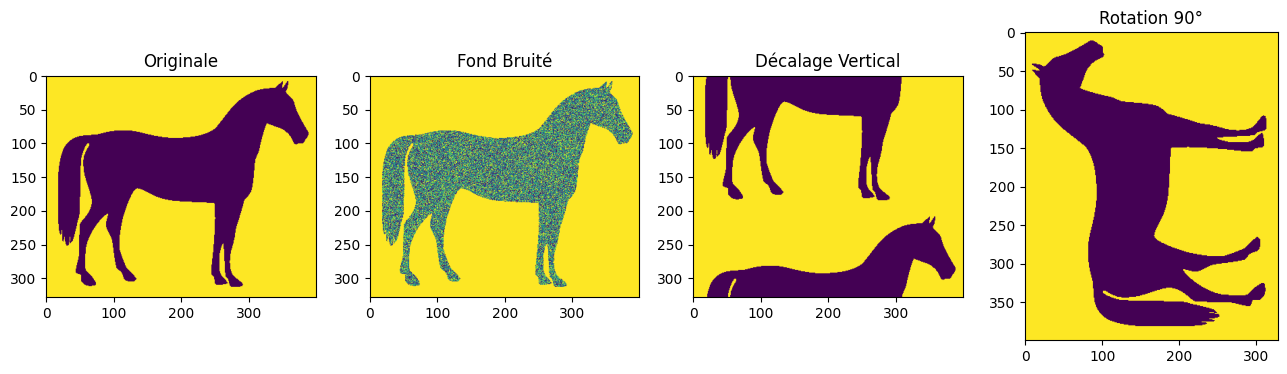

In [7]:
print("### Traitement d'Images ###")
img_arr = data.horse().astype(np.uint8) * 255
fig, axs = plt.subplots(1, 4, figsize=(16, 4))
axs[0].imshow(img_arr)
axs[0].set_title('Originale')

tmp_arr = img_arr.copy()
noise = np.random.randint(0, 256, size=tmp_arr[tmp_arr < 1].shape)
tmp_arr[tmp_arr < 1] = noise
axs[1].imshow(tmp_arr)
axs[1].set_title('Fond Bruité')

tmp_arr = np.roll(img_arr.copy(), 200, axis=0)
axs[2].imshow(tmp_arr)
axs[2].set_title('Décalage Vertical')

tmp_arr = np.rot90(img_arr.copy())
axs[3].imshow(tmp_arr)
axs[3].set_title('Rotation 90°')

plt.show()

---
## 7. Performance : Vectorisation vs Boucles

Démonstration de l'efficacité des opérations vectorisées de NumPy.

In [8]:
print("### Performance ###")
timer = time()
big_arr = np.zeros((100, 100, 100))
for i in range(100):
    for j in range(100):
        for k in range(100):
            big_arr[i, j, k] += 1
print(f'Temps avec boucles : {time() - timer:.4f}s')

timer = time()
big_arr = np.zeros((100, 100, 100))
big_arr += 1
print(f'Temps avec vectorisation : {time() - timer:.4f}s')

### Performance ###
Temps avec boucles : 0.1693s
Temps avec vectorisation : 0.0015s


---
## 8. Concepts Avancés

### 8.1 Slicing Avancé

Le slicing en NumPy est bien plus puissant qu'en Python standard. Vous pouvez accéder à des sous-ensembles de données multidimensionnelles de manière flexible et efficace.

**Concepts clés :**
- Utiliser `:` pour sélectionner toutes les éléments le long d'un axe
- Combiner les indices pour accéder à des portions spécifiques
- Utiliser l'opérateur `...` (Ellipsis) pour représenter `: , :, ...`

![](../ressources/2d_slicing.png)


In [9]:
print("### 8.1 Slicing Avancé ###")
arr = np.empty((100, 50, 75))

print("Tous les éléments:")
print("arr[...].shape :", arr[...].shape)
print("arr[:].shape :", arr[:].shape)
print()

print("Sélection 2D (une couche à la fois):")
print("arr[0,:,:].shape :", arr[0, :, :].shape)  # Première 'couche' (premières données)
print("arr[:,0,:].shape :", arr[:, 0, :].shape)  # Une 'colonne' de couches
print("arr[:,:,0].shape :", arr[:, :, 0].shape)  # Une 'tranche' horizontale
print()

print("Sélection 1D (extraction d'une ligne):")
print("arr[0,0,:].shape :", arr[0, 0, :].shape)
print("arr[0,:,0].shape :", arr[0, :, 0].shape)
print("arr[:,0,0].shape :", arr[:, 0, 0].shape)
print()

### 8.1 Slicing Avancé ###
Tous les éléments:
arr[...].shape : (100, 50, 75)
arr[:].shape : (100, 50, 75)

Sélection 2D (une couche à la fois):
arr[0,:,:].shape : (50, 75)
arr[:,0,:].shape : (100, 75)
arr[:,:,0].shape : (100, 50)

Sélection 1D (extraction d'une ligne):
arr[0,0,:].shape : (75,)
arr[0,:,0].shape : (50,)
arr[:,0,0].shape : (100,)



### 8.2 Broadcasting

Le broadcasting est un mécanisme puissant qui permet d'effectuer des opérations sur des tableaux de formes différentes. NumPy élargit automatiquement les dimensions des plus petits tableaux pour les rendre compatibles avec les plus grands.

**Règles du broadcasting :**
1. Si les tableaux n'ont pas le même nombre de dimensions, on ajoute des dimensions de taille 1 au début du plus petit
2. Les dimensions doivent être égales OU l'une d'elles doit être 1
3. Si une dimension est 1, elle peut être "étirée" pour correspondre à l'autre dimension

**Exemples :**
- `(7, 5) + (5,)` → `(7, 5)` ✓ (la dimension 5 est compatible, puis étendue)
- `(7, 5) + (7,)` → ❌ (incompatible, 5 ≠ 7 et ni l'un ni l'autre n'est 1)
- `(7, 5) + (1,)` → `(7, 5)` ✓ (la dimension 1 s'étend)
- `(7, 5) + (1)` → `(7, 5)` ✓ (scalaire, s'étend toujours)

![](../ressources/broadcasting.png)


In [10]:
print("### 8.2 Broadcasting ###")
arr_1 = np.ones((7, 5))
arr_2 = np.arange(7) * 2

print("arr_1 shape:", arr_1.shape)
print("arr_2 shape:", arr_2.shape)
print()

# Exemple 1 : Incompatible sans transpose
print("Exemple 1 - Transposition nécessaire:")
print("(7, 5) + (7,) ne fonctionne pas directement")
print("Solution : (7, 5).T + (7,) = (5, 7), puis transposer de retour")
new_arr = (arr_1.T + arr_2).T
print("Résultat shape:", new_arr.shape)
print()

# Exemple 2 : Compatible en ajoutant une dimension
print("Exemple 2 - Ajouter un scalaire:")
new_arr = arr_1 + 1
print("(7, 5) + (scalaire) :", new_arr.shape)
print()

# Exemple 3 : Compatible avec reshape
print("Exemple 3 - Utiliser reshape pour modifier les dimensions:")
arr_3 = np.arange(5)
new_arr = arr_1 + arr_3  # (7, 5) + (5,) fonctionne !
print("(7, 5) + (5,) :", new_arr.shape)

### 8.2 Broadcasting ###
arr_1 shape: (7, 5)
arr_2 shape: (7,)

Exemple 1 - Transposition nécessaire:
(7, 5) + (7,) ne fonctionne pas directement
Solution : (7, 5).T + (7,) = (5, 7), puis transposer de retour
Résultat shape: (7, 5)

Exemple 2 - Ajouter un scalaire:
(7, 5) + (scalaire) : (7, 5)

Exemple 3 - Utiliser reshape pour modifier les dimensions:
(7, 5) + (5,) : (7, 5)


### 8.3 Stacking et Concatenation

Combiner plusieurs tableaux est une opération courante en traitement de données. NumPy offre plusieurs fonctions pour ce faire :

- **`np.concatenate()`** : Joint les tableaux le long d'un axe existant
- **`np.stack()`** : Crée un nouvel axe et empile les tableaux dedans
- **`np.vstack()` / `np.hstack()`** : Versions simplifiées pour empilage vertical/horizontal
- **`np.append()`** : Ajoute des éléments à la fin

**Différences clés :**
- `concatenate` augmente la taille selon un axe existant
- `stack` crée un nouvel axe (augmente le nombre de dimensions)
- `vstack` empile les lignes (utile pour joindre des matrices ligne par ligne)
- `hstack` empile les lignes (utile pour joindre des matrices colonne par colonne)


In [16]:
print("### 8.3 Stacking et Concatenation ###")
arr_1 = np.ones((3, 4, 2))
arr_2 = np.ones((3, 4)) * 2

print("arr_1 shape:", arr_1.shape, "(3D)")
print("arr_2 shape:", arr_2.shape, "(2D)")
print()

# Problème : dimensions incompatibles pour vstack
print("Problème - Empiler directement échoue (dimensions différentes)")
print("Solution : ajouter une dimension à arr_2")
arr_2_expanded = np.expand_dims(arr_2, axis=-1)
print("arr_2 après expand_dims:", arr_2_expanded.shape)
new_arr = np.concatenate([arr_1, arr_2_expanded], axis=2)
print("Résultat après concatenate sur axis=2:", new_arr.shape)
print()

# Stack crée un nouvel axe
print("Utiliser stack pour créer un nouvel axe :")
print("array_1[:,:,0] shape:", arr_1[:, :, 0].shape)
print("array_2 shape:", arr_2.shape)
for i in range(3):
    new_arr = np.stack([arr_1[:, :, 0], arr_2], axis=i)
    print(f"np.stack avec axis={i}: {new_arr.shape}")

### 8.3 Stacking et Concatenation ###
arr_1 shape: (3, 4, 2) (3D)
arr_2 shape: (3, 4) (2D)

Problème - Empiler directement échoue (dimensions différentes)
Solution : ajouter une dimension à arr_2
arr_2 après expand_dims: (3, 4, 1)
Résultat après concatenate sur axis=2: (3, 4, 3)

Utiliser stack pour créer un nouvel axe :
array_1[:,:,0] shape: (3, 4)
array_2 shape: (3, 4)
np.stack avec axis=0: (2, 3, 4)
np.stack avec axis=1: (3, 2, 4)
np.stack avec axis=2: (3, 4, 2)


### 8.4 Shallow vs Deep Copy

Lors du travail avec les tableaux NumPy, il est crucial de comprendre la différence entre les références (shallow copy) et les copies indépendantes (deep copy).

**Shallow Copy (Référence) :**
- `arr_2 = arr_1` : `arr_2` pointe vers les mêmes données que `arr_1`
- Modifier `arr_2` modifie également `arr_1` (partage de mémoire)
- Utile pour l'efficacité mémoire, dangereux si vous n'y faites pas attention

**Deep Copy (Copie Indépendante) :**
- `arr_2 = arr_1.copy()` : `arr_2` est une copie indépendante
- Modifier `arr_2` ne touche pas à `arr_1` (mémoire séparée)
- Plus gourmand en mémoire, mais sûr


In [12]:
print("### 8.4 Shallow vs Deep Copy ###")
print()

print("1. Shallow Copy (référence) - PROBLÉMATIQUE:")
arr_1 = np.arange(100).reshape((10, 10))
arr_2 = arr_1  # Pas de copie, juste une référence
print("Avant modification - arr_1 == arr_2 ?", np.all(arr_1 == arr_2))
arr_2[1, 1] = 0  # Modification
print("Après arr_2[1,1] = 0 - arr_1 == arr_2 ?", np.all(arr_1 == arr_2))
print("! arr_1 a aussi été modifié !")
print()

print("2. Deep Copy (copie indépendante) - SÛRE:")
arr_1 = np.arange(100).reshape((10, 10))
arr_2 = arr_1.copy()  # Copie indépendante
print("Avant modification - arr_1 == arr_2 ?", np.all(arr_1 == arr_2))
arr_2[1, 1] = 0  # Modification
print("Après arr_2[1,1] = 0 - arr_1 == arr_2 ?", np.all(arr_1 == arr_2))
print("✓ arr_1 n'a pas été modifié")

### 8.4 Shallow vs Deep Copy ###

1. Shallow Copy (référence) - PROBLÉMATIQUE:
Avant modification - arr_1 == arr_2 ? True
Après arr_2[1,1] = 0 - arr_1 == arr_2 ? True
! arr_1 a aussi été modifié !

2. Deep Copy (copie indépendante) - SÛRE:
Avant modification - arr_1 == arr_2 ? True
Après arr_2[1,1] = 0 - arr_1 == arr_2 ? False
✓ arr_1 n'a pas été modifié


### 8.5 Opérations le long d'un Axe

Réduire un tableau le long d'un axe spécifique (somme, moyenne, max, etc.) est fondamental en analyse de données.

**Concepts :**
- `axis=0` : opère sur les lignes (réduit la première dimension)
- `axis=1` : opère sur les colonnes (réduit la deuxième dimension)
- `axis=-1` : opère sur le dernier axe
- `np.rollaxis()` : réorganise les axes pour faciliter les opérations

**Cas d'usage :**
- Calculer la moyenne par colonne : `np.mean(arr, axis=0)`
- Calculer la somme par ligne : `np.sum(arr, axis=1)`
- Normaliser chaque "slice" : diviser par `np.max(arr, axis=-1, keepdims=True)`


In [13]:
print("### 8.5 Opérations le long d'un Axe ###")
arr_1 = np.ones((3, 4, 2))

print("Méthode 1 - Itérer avec slicing (axis=0):")
for i, arr in enumerate(arr_1):
    print(f"  Index {i}: shape={arr.shape}, sum={np.sum(arr)}")
print()

print("Méthode 2 - Itérer avec rollaxis (axis=1):")
for i, arr in enumerate(np.rollaxis(arr_1, axis=1)):
    print(f"  Index {i}: shape={arr.shape}, sum={np.sum(arr)}")
print()

print("Méthode 3 - Équivalent avec slicing (axis=1):")
for i in range(arr_1.shape[1]):
    arr_slice = arr_1[:, i, :]
    print(f"  Index {i}: shape={arr_slice.shape}, sum={np.sum(arr_slice)}")

### 8.5 Opérations le long d'un Axe ###
Méthode 1 - Itérer avec slicing (axis=0):
  Index 0: shape=(4, 2), sum=8.0
  Index 1: shape=(4, 2), sum=8.0
  Index 2: shape=(4, 2), sum=8.0

Méthode 2 - Itérer avec rollaxis (axis=1):
  Index 0: shape=(3, 2), sum=6.0
  Index 1: shape=(3, 2), sum=6.0
  Index 2: shape=(3, 2), sum=6.0
  Index 3: shape=(3, 2), sum=6.0

Méthode 3 - Équivalent avec slicing (axis=1):
  Index 0: shape=(3, 2), sum=6.0
  Index 1: shape=(3, 2), sum=6.0
  Index 2: shape=(3, 2), sum=6.0
  Index 3: shape=(3, 2), sum=6.0


---
## 9. Défis pratiques

### Défi 1 : Création et Propriétés

**Objectif :** Maîtriser la création de tableaux de différentes dimensions et comprendre leurs propriétés.

**Instructions :**
1. Créez un tableau 1D de 10 zéros.
2. Créez un tableau 1D contenant les entiers de 10 à 49.
3. Créez une matrice identité 3x3.
4. Créez un tableau 3x3x3 avec des valeurs aléatoires.
5. Affichez les propriétés (`shape`, `ndim`, `dtype`) du tableau aléatoire.


In [14]:
# Défi 1 : Votre code ici
print('### Défi 1 - Votre Solution ###')
# À compléter...

### Défi 1 - Votre Solution ###


<details>
 <summary>Voir réponse</summary>
<br />

**Solution du Défi 1 :**

```python
print('### Solution Défi 1 ###')
zeros_arr = np.zeros(10)
print(f"1. Tableau de zéros : {zeros_arr}")

range_arr = np.arange(10, 50)
print(f"2. Tableau de 10 à 49 : {range_arr}")

identity_matrix = np.eye(3)
print(f"3. Matrice identité 3x3 :\n{identity_matrix}")

random_arr_3d = np.random.rand(3, 3, 3)
print(f"4. Tableau aléatoire 3x3x3 :\n{random_arr_3d}")

print(f"5. Shape : {random_arr_3d.shape}, Ndim : {random_arr_3d.ndim}, Dtype : {random_arr_3d.dtype}")
```

**Explication :**
- `np.zeros(10)` crée un tableau 1D de 10 zéros
- `np.arange(10, 50)` génère une séquence d'entiers de 10 à 49
- `np.eye(3)` crée une matrice identité 3x3 (1 sur la diagonale, 0 ailleurs)
- `np.random.rand(3, 3, 3)` génère un tableau 3D avec des valeurs aléatoires entre 0 et 1
- `shape` indique les dimensions du tableau, `ndim` le nombre de dimensions, `dtype` le type de données

</details>

### Défi 2 : Indexation et Slicing

**Objectif :** Maîtriser l'accès et la modification d'éléments dans les tableaux NumPy.

**Instructions :**
1. Créez un tableau 1D (0 à 10) et inversez-le.
2. Créez une matrice 4x4 (0 à 15).
3. Extraire la sous-matrice 2x2 du coin supérieur droit.
4. Mettez à zéro la deuxième ligne de la matrice.


In [ ]:
# Défi 2 : Votre code ici
print('### Défi 2 - Votre Solution ###')
# À compléter...

<details>
 <summary>Voir réponse</summary>
<br />

**Solution du Défi 2 :**

```python
print('### Solution Défi 2 ###')
arr_1d = np.arange(11)
reversed_arr = arr_1d[::-1]
print(f"1. Tableau inversé : {reversed_arr}")

matrix = np.arange(16).reshape(4, 4)
print(f"2. Matrice 4x4 :\n{matrix}")

sub_matrix = matrix[:2, 2:]
print(f"3. Sous-matrice 2x2 du coin supérieur droit :\n{sub_matrix}")

matrix[1, :] = 0
print(f"4. Matrice avec deuxième ligne à zéro :\n{matrix}")
```

**Explication :**
- `arr_1d[::-1]` utilise le slicing avec un pas de -1 pour inverser le tableau
- `np.arange(16).reshape(4, 4)` crée une matrice 4x4 avec les nombres 0-15
- `matrix[:2, 2:]` sélectionne les 2 premières lignes et les 2 dernières colonnes (coin supérieur droit)
- `matrix[1, :] = 0` met tous les éléments de la ligne d'index 1 à zéro

</details>

### Défi 3 : Masques et Conditions

**Objectif :** Utiliser les conditions et les masques booléens pour filtrer et modifier des données.

**Instructions :**
1. Créez un tableau 1D de 20 nombres aléatoires entre 0 et 100.
2. Créez un masque booléen pour les éléments > 50 et affichez-les.
3. Remplacez tous les éléments < 30 par -1.
4. Utilisez `np.where()` pour créer un nouveau tableau où les valeurs < 50 deviennent 0 et les autres deviennent 1.
5. Créez une matrice 3x3 aléatoire et remplacez les éléments de la diagonale par 999.


In [ ]:
# Défi 3 : Votre code ici
print('### Défi 3 - Votre Solution ###')
# À compléter...

<details>
 <summary>Voir réponse</summary>
<br />

**Solution du Défi 3 :**

```python
print('### Solution Défi 3 ###')

# 1. Créer un tableau de nombres aléatoires
random_arr = np.random.randint(0, 101, size=20)
print(f"1. Tableau aléatoire :\n{random_arr}")

# 2. Masque pour éléments > 50
mask_gt_50 = random_arr > 50
print(f"\n2. Éléments > 50 :\n{random_arr[mask_gt_50]}")

# 3. Remplacer < 30 par -1
arr_modified = random_arr.copy()
arr_modified[arr_modified < 30] = -1
print(f"\n3. Après remplacement (< 30 → -1) :\n{arr_modified}")

# 4. Utiliser np.where()
arr_where = np.where(random_arr < 50, 0, 1)
print(f"\n4. np.where() - (< 50 → 0, sinon → 1) :\n{arr_where}")

# 5. Matrice avec diagonale modifiée
matrix_3x3 = np.random.rand(3, 3)
np.fill_diagonal(matrix_3x3, 999)
print(f"\n5. Matrice 3x3 avec diagonale = 999 :\n{matrix_3x3}")
```

**Explication :**
- **Masques booléens** : `array > 50` crée un tableau de True/False, utilisé pour filtrer
- **Indexation conditionnelle** : `array[array < 30] = -1` modifie les éléments satisfaisant la condition
- **`np.where(condition, valeur_si_vrai, valeur_si_faux)`** : Crée un nouveau tableau en fonction d'une condition
- **`np.fill_diagonal()`** : Remplit la diagonale d'une matrice
- **Copie** : Toujours utiliser `.copy()` avant de modifier si vous voulez conserver l'original

**Concepts avancés :**
- Les masques booléens sont très efficaces pour le filtrage et la modification sélective
- `np.where()` peut aussi être utilisé avec une seule condition : `np.where(mask)` retourne les indices True
- Vous pouvez combiner plusieurs conditions : `(arr > 10) & (arr < 50)` (AND) ou `(arr < 10) | (arr > 50)` (OR)

</details>